In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('sales data-set.csv')
features = pd.read_csv('Features data set.csv')
stores = pd.read_csv('stores data-set.csv')

In [3]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
# Объединим данные
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%Y')
features['Date'] = pd.to_datetime(features['Date'], format='%d/%m/%Y')

data = sales.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')
data = data.merge(stores, on='Store', how='left')

In [7]:
data = sales.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')
data = data.merge(stores, on='Store', how='left')

In [8]:
# Смотрим на пропуски в колонках MarkDown
md_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
data[md_cols].isnull().sum() / data.shape[0] * 100

MarkDown1    64.257181
MarkDown2    73.611025
MarkDown3    67.480845
MarkDown4    67.984676
MarkDown5    64.079038
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [10]:
# Пока заполним пропуски в MarkDown нулями
data.fillna(0, inplace=True) 
data.sort_values(by=['Date', 'Store'], inplace=True)   

# EDA

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421570 n

In [12]:
data.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375360,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328


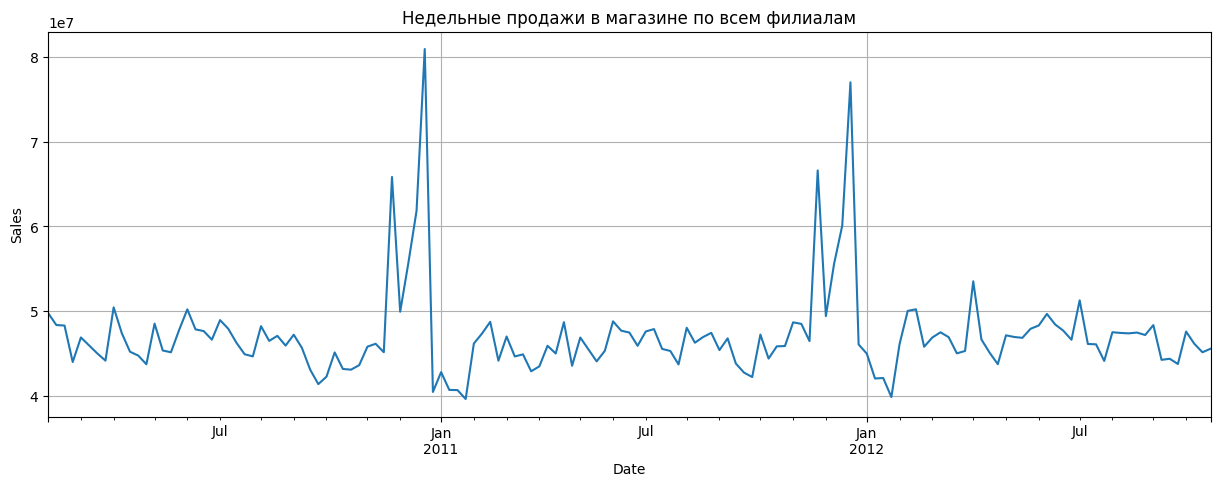

In [13]:
weekly_sales = data.groupby('Date')['Weekly_Sales'].sum()

# Построим тренд
plt.figure(figsize=(15, 5))
weekly_sales.plot()
plt.title('Недельные продажи в магазине по всем филиалам')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

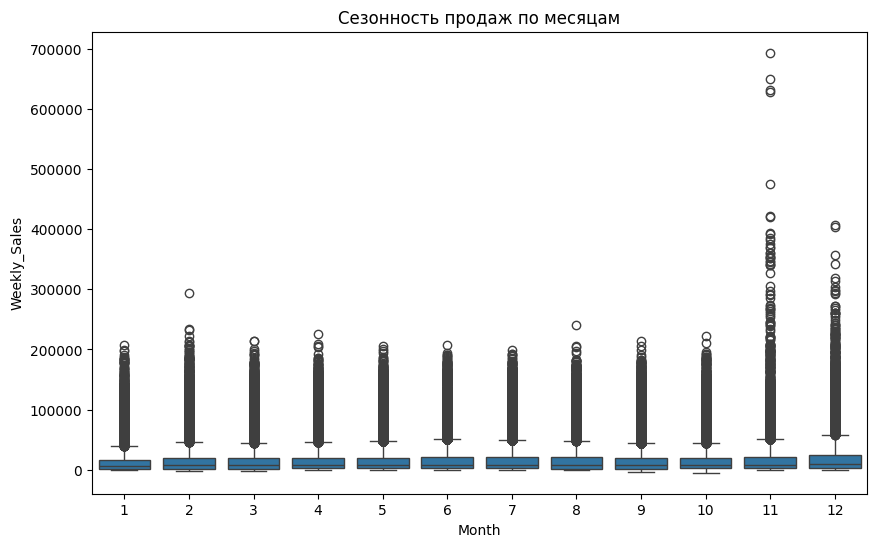

In [14]:
# Добавим год и месяц
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

# Продажи по месяцам
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Month', y='Weekly_Sales')
plt.title('Сезонность продаж по месяцам')
plt.show()

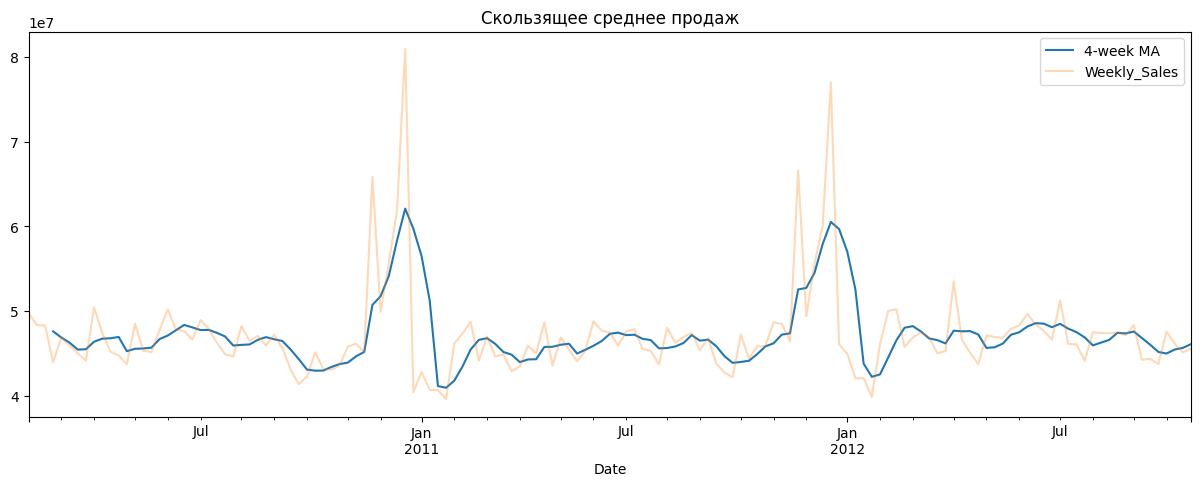

In [15]:
weekly_sales.rolling(window=4).mean().plot(figsize=(15,5), label='4-week MA')
weekly_sales.plot(alpha=0.3)
plt.title("Скользящее среднее продаж")
plt.legend()
plt.show()


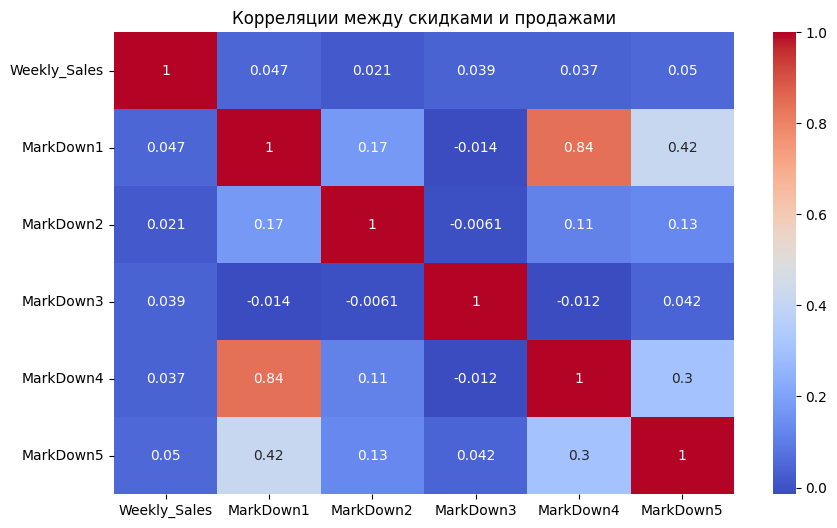

In [16]:
# Корреляция скидок
correlation = data[['Weekly_Sales'] + md_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Корреляции между скидками и продажами")
plt.show()

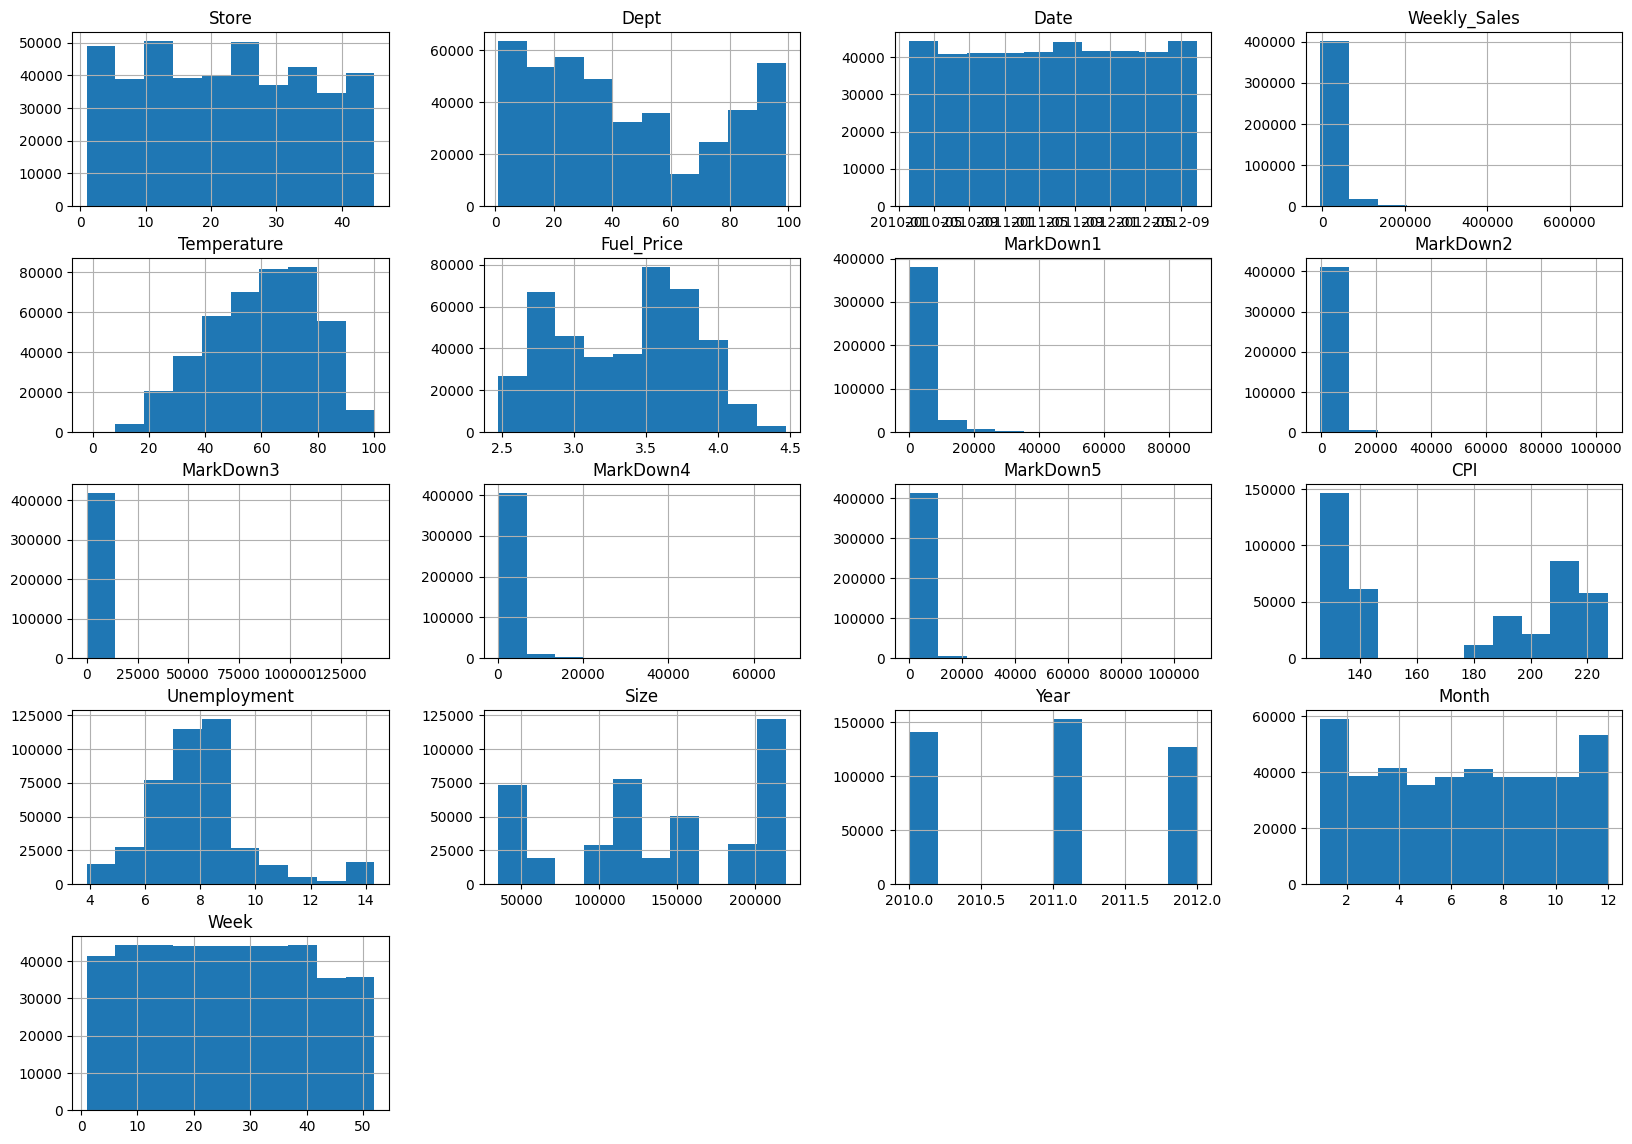

In [17]:
data.hist(figsize = (20 , 14))
plt.show()

# Разбиваем данные, преобрабатываем, добавляем лаги и скользящее среднее

In [19]:
data = data.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)

cutoff_date = '2012-06-01'
train = data[data['Date'] < cutoff_date].copy()
test = data[data['Date'] >= cutoff_date].copy()

In [20]:
# Добавим лаги и скользящие средние ===
def add_lag_features(data, lags=[1, 2, 3], windows=[3, 7]):
    df = data.copy()
    
    for lag in lags:
        df[f'lag_{lag}'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(lag)
        
    for win in windows:
        df[f'rolling_mean_{win}'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).rolling(window=win).mean()
    
    return df

train = add_lag_features(train)
test = add_lag_features(test)

train = train.dropna()
test = test.fillna(0)

In [31]:
from sklearn.preprocessing import LabelEncoder


# Кодируем категориальные признаки
le = LabelEncoder()
train['Type'] = le.fit_transform(train['Type'])
test['Type'] = le.transform(test['Type'])

In [32]:
# Для ML
X_train = train.drop(columns=['Weekly_Sales', 'Date'])  
y_train = train['Weekly_Sales']

X_test = test.drop(columns=['Weekly_Sales', 'Date'])
y_test = test['Weekly_Sales']

In [ ]:
# Данные для Sarimax. Выбираем Store=1, Dept=1
ts_train = train[(train['Store'] == 1) & (train['Dept'] == 1)].copy()
ts_test = test[(test['Store'] == 1) & (test['Dept'] == 1)].copy()

# Обучаем ML модели

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
def evaluate_model(model, X_train, y_train, X_test, y_test):   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model.__class__.__name__} Метрики:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2: {r2:.4f}")
    

# Линейная регрессия
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
evaluate_model(lr_model, X_train, y_train, X_test, y_test)

LinearRegression Метрики:
MAE: 4075.0132
MSE: 94136614.0050
R2: 0.8060


/Users/ulya/ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ulya/ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ulya/ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ulya/ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ulya/ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ulya/ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  retur

In [39]:
# CatBoost
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
evaluate_model(catboost_model, X_train, y_train, X_test, y_test)

CatBoostRegressor Метрики:
MAE: 3288.4585
MSE: 106293817.4178
R2: 0.7809


In [40]:
# XGBoost
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

XGBRegressor Метрики:
MAE: 2848.1956
MSE: 66746241.9513
R2: 0.8624


# 

# Sarima


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [51]:
exog_features = [
    'IsHoliday', 'Temperature', 'Fuel_Price', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'CPI', 'Unemployment', 'Type_encoded'
]

# Подготовка train
ts_train_pr = ts_train.set_index('Date')
y_train_sarimax = ts_train_pr['Weekly_Sales'].astype('float64')  # Важно: float64
X_train_sarimax = ts_train_pr[exog_features].astype('float64')   # Все признаки в float64

# Подготовка test
ts_test_pr = ts_test.set_index('Date')
y_test_sarimax = ts_test_pr['Weekly_Sales'].astype('float64')
X_test_sarimax = ts_test_pr[exog_features].astype('float64')

# Проверка пропусков (заполняем нулями, если нужно)
X_train_sarimax = X_train_sarimax.fillna(0)
X_test_sarimax = X_test_sarimax.fillna(0)

In [52]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 52)  # 52 недели в году

model = SARIMAX(
    endog=y_train_sarimax,
    exog=X_train_sarimax,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)

/Users/ulya/ML/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/ulya/ML/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/ulya/ML/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/ulya/ML/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/ulya/ML/venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
/Users/ulya/ML/venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866:

In [54]:
forecast = results.get_forecast(steps=len(y_test_sarimax), exog=X_test_sarimax)
predicted_sales = forecast.predicted_mean

# Выравниваем индексы (на случай, если они отличаются)
y_test_aligned = y_test_sarimax[predicted_sales.index]

# Рассчитываем метрики
mse = mean_squared_error(y_test_aligned, predicted_sales)
mae = mean_absolute_error(y_test_aligned, predicted_sales)
r2 = r2_score(y_test_aligned, predicted_sales)

print(f"SARIMAX Метрики:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

SARIMAX Метрики:
MSE: 89010967.1903
MAE: 7539.1539
R²: -8.9386
